In [133]:
import pandas as pd
import urllib as ul
import numpy as np
from Bio import Entrez
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

In [4]:
data = pd.read_csv('SFARI-Gene_genes_11-07-2022release_11-10-2022export.csv', header=0, sep=',')
data

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,6
1,9,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,Rare Single Gene Mutation,2.0,0,NaN,1
2,9,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,"Rare Single Gene Mutation, Functional",2.0,0,NaN,9
3,9,ABCA7,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000064687,19,Rare Single Gene Mutation,2.0,0,NaN,4
4,9,ABL2,"ABL proto-oncogene 2, non-receptor tyrosine ki...",ENSG00000143322,1,"Rare Single Gene Mutation, Functional",3.0,0,NaN,10
...,...,...,...,...,...,...,...,...,...,...
1090,9,ZNF774,Zinc finger protein 774,ENSG00000196391,15,Rare Single Gene Mutation,2.0,0,NaN,3
1091,9,ZNF804A,Zinc finger protein 804A,ENSG00000170396,2,"Rare Single Gene Mutation, Genetic Association...",2.0,0,NaN,15
1092,9,ZNF827,Zinc finger protein 827,ENSG00000151612,4,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,2
1093,9,ZSWIM6,zinc finger SWIM-type containing 6,ENSG00000130449,5,"Rare Single Gene Mutation, Syndromic, Genetic ...",NaN,1,NaN,5


In [5]:
human_df = pd.read_csv('Homo_sapiens.gene_info.gz', compression='gzip', header=0, sep='\t')

In [6]:
for gene_symbol in list(data['gene-symbol']):
    gene_id = human_df[human_df['Symbol'] == 'A2M']['GeneID']

In [8]:
human_df

,#tax_id,GeneID,Symbol,LocusTag,Synonyms,dbXrefs,chromosome,map_location,description,type_of_gene,Symbol_from_nomenclature_authority,Full_name_from_nomenclature_authority,Nomenclature_status,Other_designations,Modification_date,Feature_type
0,9606,1,A1BG,-,A1B|ABG|GAB|HYST2477,MIM:138670|HGNC:HGNC:5|Ensembl:ENSG00000121410...,19,19q13.43,alpha-1-B glycoprotein,protein-coding,A1BG,alpha-1-B glycoprotein,O,alpha-1B-glycoprotein|HEL-S-163pA|epididymis s...,20220805,-
1,9606,2,A2M,-,A2MD|CPAMD5|FWP007|S863-7,MIM:103950|HGNC:HGNC:7|Ensembl:ENSG00000175899...,12,12p13.31,alpha-2-macroglobulin,protein-coding,A2M,alpha-2-macroglobulin,O,alpha-2-macroglobulin|C3 and PZP-like alpha-2-...,20221106,-
2,9606,3,A2MP1,-,A2MP,HGNC:HGNC:8|Ensembl:ENSG00000291190|AllianceGe...,12,12p13.31,alpha-2-macroglobulin pseudogene 1,pseudo,A2MP1,alpha-2-macroglobulin pseudogene 1,O,pregnancy-zone protein pseudogene,20221025,-
3,9606,9,NAT1,-,AAC1|MNAT|NAT-1|NATI,MIM:108345|HGNC:HGNC:7645|Ensembl:ENSG00000171...,8,8p22,N-acetyltransferase 1,protein-coding,NAT1,N-acetyltransferase 1,O,arylamine N-acetyltransferase 1|N-acetyltransf...,20220925,-
4,9606,10,NAT2,-,AAC2|NAT-2|PNAT,MIM:612182|HGNC:HGNC:7646|Ensembl:ENSG00000156...,8,8p22,N-acetyltransferase 2,protein-coding,NAT2,N-acetyltransferase 2,O,arylamine N-acetyltransferase 2|N-acetyltransf...,20221009,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108762,741158,8923215,trnD,-,-,-,MT,-,tRNA-Asp,tRNA,-,-,-,-,20200909,-
108763,741158,8923216,trnP,-,-,-,MT,-,tRNA-Pro,tRNA,-,-,-,-,20200909,-
108764,741158,8923217,trnA,-,-,-,MT,-,tRNA-Ala,tRNA,-,-,-,-,20200909,-
108765,741158,8923218,COX1,-,-,-,MT,-,cytochrome c oxidase subunit I,protein-coding,-,-,-,cytochrome c oxidase subunit I,20200909,-


In [10]:
merge_data = data.merge(human_df, left_on=['gene-symbol'], right_on=['Symbol'])
merge_data

,status,gene-symbol,gene-name,ensembl-id,chromosome_x,genetic-category,gene-score,syndromic,eagle,number-of-reports,...,chromosome_y,map_location,description,type_of_gene,Symbol_from_nomenclature_authority,Full_name_from_nomenclature_authority,Nomenclature_status,Other_designations,Modification_date,Feature_type
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,6,...,16,16p13.2,4-aminobutyrate aminotransferase,protein-coding,ABAT,4-aminobutyrate aminotransferase,O,"4-aminobutyrate aminotransferase, mitochondria...",20221106,-
1,9,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,Rare Single Gene Mutation,2.0,0,NaN,1,...,17,17q24.3,ATP binding cassette subfamily A member 10,protein-coding,ABCA10,ATP binding cassette subfamily A member 10,O,ATP-binding cassette sub-family A member 10|AT...,20221106,-
2,9,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,"Rare Single Gene Mutation, Functional",2.0,0,NaN,9,...,7,7p12.3,ATP binding cassette subfamily A member 13,protein-coding,ABCA13,ATP binding cassette subfamily A member 13,O,ATP-binding cassette sub-family A member 13|AT...,20220922,-
3,9,ABCA7,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000064687,19,Rare Single Gene Mutation,2.0,0,NaN,4,...,19,19p13.3,ATP binding cassette subfamily A member 7,protein-coding,ABCA7,ATP binding cassette subfamily A member 7,O,phospholipid-transporting ATPase ABCA7|ATP-bin...,20220922,-
4,9,ABL2,"ABL proto-oncogene 2, non-receptor tyrosine ki...",ENSG00000143322,1,"Rare Single Gene Mutation, Functional",3.0,0,NaN,10,...,1,1q25.2,"ABL proto-oncogene 2, non-receptor tyrosine ki...",protein-coding,ABL2,"ABL proto-oncogene 2, non-receptor tyrosine ki...",O,tyrosine-protein kinase ABL2|Abelson tyrosine-...,20221106,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,9,ZNF774,Zinc finger protein 774,ENSG00000196391,15,Rare Single Gene Mutation,2.0,0,NaN,3,...,15,15q26.1,zinc finger protein 774,protein-coding,ZNF774,zinc finger protein 774,O,zinc finger protein 774,20220805,-
1089,9,ZNF804A,Zinc finger protein 804A,ENSG00000170396,2,"Rare Single Gene Mutation, Genetic Association...",2.0,0,NaN,15,...,2,2q32.1,zinc finger protein 804A,protein-coding,ZNF804A,zinc finger protein 804A,O,zinc finger protein 804A,20221009,-
1090,9,ZNF827,Zinc finger protein 827,ENSG00000151612,4,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,2,...,4,4q31.21-q31.22,zinc finger protein 827,protein-coding,ZNF827,zinc finger protein 827,O,zinc finger protein 827,20221104,-
1091,9,ZSWIM6,zinc finger SWIM-type containing 6,ENSG00000130449,5,"Rare Single Gene Mutation, Syndromic, Genetic ...",NaN,1,NaN,5,...,5,5q12.1,zinc finger SWIM-type containing 6,protein-coding,ZSWIM6,zinc finger SWIM-type containing 6,O,zinc finger SWIM domain-containing protein 6|z...,20220821,-


In [11]:
gene2go = pd.read_csv('gene2go.gz', compression='gzip', header=0, sep='\t')
human_gene2go = gene2go[gene2go['#tax_id']==9606]
gos = pd.merge(merge_data,human_gene2go,right_on='GeneID',left_on='GeneID')

In [18]:
gos

,status,gene-symbol,gene-name,ensembl-id,chromosome_x,genetic-category,gene-score,syndromic,eagle,number-of-reports,...,Other_designations,Modification_date,Feature_type,#tax_id_y,GO_ID,Evidence,Qualifier,GO_term,PubMed,Category
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,6,...,"4-aminobutyrate aminotransferase, mitochondria...",20221106,-,9606,GO:0001666,IEA,involved_in,response to hypoxia,-,Process
1,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,6,...,"4-aminobutyrate aminotransferase, mitochondria...",20221106,-,9606,GO:0003867,IDA,contributes_to,4-aminobutyrate transaminase activity,15528998,Function
2,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,6,...,"4-aminobutyrate aminotransferase, mitochondria...",20221106,-,9606,GO:0005739,IBA,is_active_in,mitochondrion,21873635,Component
3,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,6,...,"4-aminobutyrate aminotransferase, mitochondria...",20221106,-,9606,GO:0005739,IDA,located_in,mitochondrion,-,Component
4,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,6,...,"4-aminobutyrate aminotransferase, mitochondria...",20221106,-,9606,GO:0005739,ISS,located_in,mitochondrion,-,Component
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30987,9,ZWILCH,zwilchkinetochore protein,ENSG00000174442,15,Rare Single Gene Mutation,2.0,0,NaN,4,...,"protein zwilch homolog|Zwilch, kinetochore ass...",20220906,-,9606,GO:0034501,IMP,involved_in,protein localization to kinetochore,15824131,Process
30988,9,ZWILCH,zwilchkinetochore protein,ENSG00000174442,15,Rare Single Gene Mutation,2.0,0,NaN,4,...,"protein zwilch homolog|Zwilch, kinetochore ass...",20220906,-,9606,GO:0051301,IEA,involved_in,cell division,-,Process
30989,9,ZWILCH,zwilchkinetochore protein,ENSG00000174442,15,Rare Single Gene Mutation,2.0,0,NaN,4,...,"protein zwilch homolog|Zwilch, kinetochore ass...",20220906,-,9606,GO:1990423,IBA,part_of,RZZ complex,21873635,Component
30990,9,ZWILCH,zwilchkinetochore protein,ENSG00000174442,15,Rare Single Gene Mutation,2.0,0,NaN,4,...,"protein zwilch homolog|Zwilch, kinetochore ass...",20220906,-,9606,GO:1990423,IDA,part_of,RZZ complex,20462495,Component


In [24]:
gos.groupby(['GO_ID']).size().sort_values(ascending=False)

GO_ID
GO:0005515    788
GO:0005886    700
GO:0005634    597
GO:0005829    525
GO:0005654    462
             ... 
GO:0015349      1
GO:0015299      1
GO:0015293      1
GO:0050891      1
GO:2001271      1
Length: 6667, dtype: int64

In [27]:
gos.groupby(['GO_term','GO_ID','gene-score']).size().sort_values(ascending=False)

GO_term                                                              GO_ID       gene-score
plasma membrane                                                      GO:0005886  2.0           495
protein binding                                                      GO:0005515  2.0           470
cytosol                                                              GO:0005829  2.0           308
nucleus                                                              GO:0005634  2.0           302
cytoplasm                                                            GO:0005737  2.0           243
                                                                                              ... 
cyclin-dependent protein serine/threonine kinase regulator activity  GO:0016538  2.0             1
oxidative phosphorylation                                            GO:0006119  3.0             1
oxidative demethylation                                              GO:0070989  2.0             1
oxidative DNA dem

In [32]:
task3 = pd.merge(gos, data, left_on=['gene-symbol'], right_on=['gene-symbol'])
task3

,status_x,gene-symbol,gene-name_x,ensembl-id_x,chromosome_x,genetic-category_x,gene-score_x,syndromic_x,eagle_x,number-of-reports_x,...,Category,status_y,gene-name_y,ensembl-id_y,chromosome,genetic-category_y,gene-score_y,syndromic_y,eagle_y,number-of-reports_y
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,6,...,Process,9,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,6
1,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,6,...,Function,9,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,6
2,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,6,...,Component,9,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,6
3,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,6,...,Component,9,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,6
4,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,6,...,Component,9,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30987,9,ZWILCH,zwilchkinetochore protein,ENSG00000174442,15,Rare Single Gene Mutation,2.0,0,NaN,4,...,Process,9,zwilchkinetochore protein,ENSG00000174442,15,Rare Single Gene Mutation,2.0,0,NaN,4
30988,9,ZWILCH,zwilchkinetochore protein,ENSG00000174442,15,Rare Single Gene Mutation,2.0,0,NaN,4,...,Process,9,zwilchkinetochore protein,ENSG00000174442,15,Rare Single Gene Mutation,2.0,0,NaN,4
30989,9,ZWILCH,zwilchkinetochore protein,ENSG00000174442,15,Rare Single Gene Mutation,2.0,0,NaN,4,...,Component,9,zwilchkinetochore protein,ENSG00000174442,15,Rare Single Gene Mutation,2.0,0,NaN,4
30990,9,ZWILCH,zwilchkinetochore protein,ENSG00000174442,15,Rare Single Gene Mutation,2.0,0,NaN,4,...,Component,9,zwilchkinetochore protein,ENSG00000174442,15,Rare Single Gene Mutation,2.0,0,NaN,4


In [31]:
task3[['gene-symbol', 'GO_ID','GO_term', 'gene-score']][:20]

KeyError: "['gene-score'] not in index"

In [70]:
br_sc1 = pd.read_csv('pantherChart_s1.txt', sep='\t', header=None)

In [71]:
br_sc1.columns = ['index', 'Category name (Accession)', 'genes', 'p1', 'p2']

In [72]:
br_sc1

,index,Category name (Accession),genes,p1,p2
0,1,cellular process (GO:0009987),157,64.3%,26.8%
1,2,reproductive process (GO:0022414),2,0.8%,0.3%
2,3,localization (GO:0051179),47,19.3%,8.0%
3,4,biological process involved in interspecies in...,4,1.6%,0.7%
4,5,reproduction (GO:0000003),2,0.8%,0.3%
5,6,biological regulation (GO:0065007),109,44.7%,18.6%
6,7,response to stimulus (GO:0050896),43,17.6%,7.3%
7,8,signaling (GO:0023052),41,16.8%,7.0%
8,9,developmental process (GO:0032502),28,11.5%,4.8%
9,10,rhythmic process (GO:0048511),1,0.4%,0.2%


In [73]:
br_sc1['genes']

0     157
1       2
2      47
3       4
4       2
5     109
6      43
7      41
8      28
9       1
10     36
11      6
12      7
13     96
14      7
Name: genes, dtype: int64

In [90]:
range(len(df))

range(0, 15)

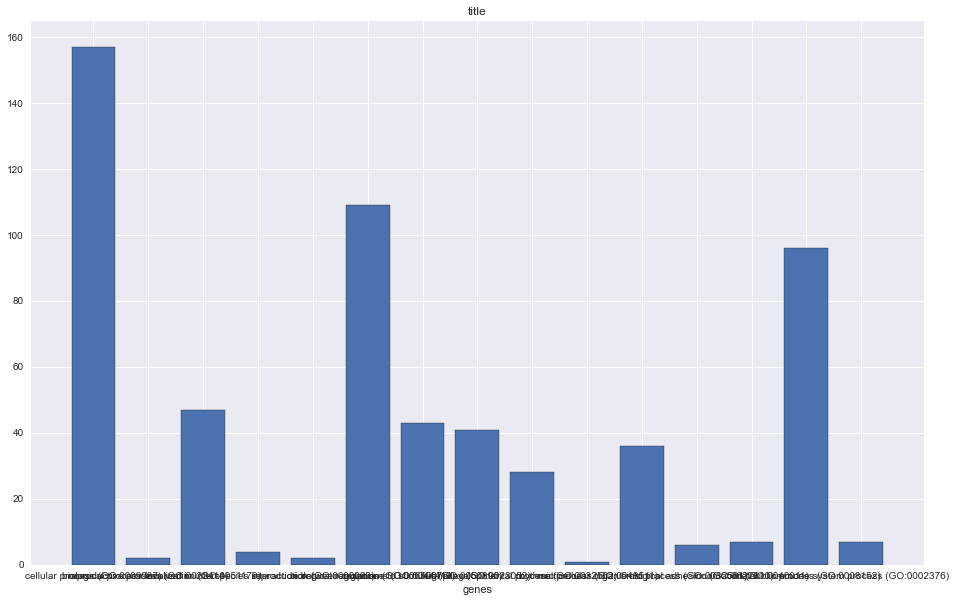

In [106]:
fig = plt.figure()
xs = br_sc1['Category name (Accession)']
ys = br_sc1['genes']
plt.bar(xs,ys)
plt.xlabel('genes')
plt.title('title')
plt.show()

In [125]:
df = br_sc1[['Category name (Accession)','genes']]

<ipython-input-130-671219f58a0b>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


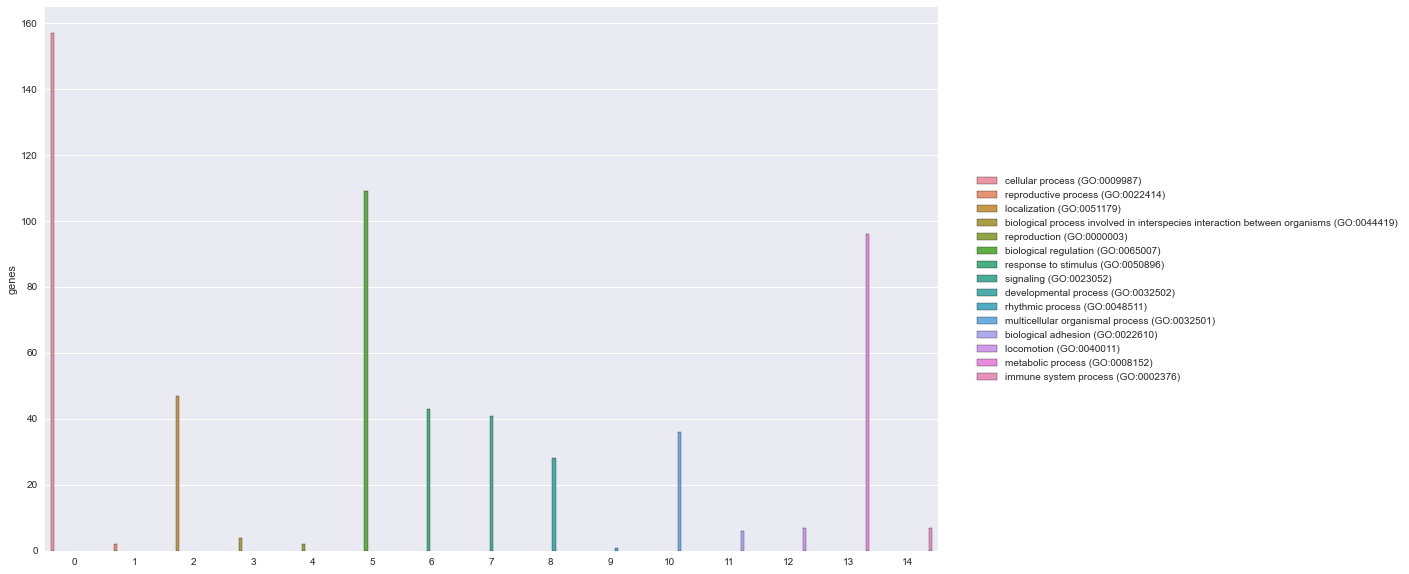

In [130]:
# plt styling parameters
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16.0, 10.0)
plt.rcParams["patch.force_edgecolor"] = True

# create a color palette the length of the dataframe
colors = sns.color_palette('husl', n_colors=len(df))

# plot
p = sns.barplot(x=df.index, y='genes', data=df, hue='Category name (Accession)')

# place the legend to the right of the plot
plt.legend(bbox_to_anchor=(1.04, 0.5), loc='center left', borderaxespad=0)
plt.show()

<ipython-input-163-65346794c892>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


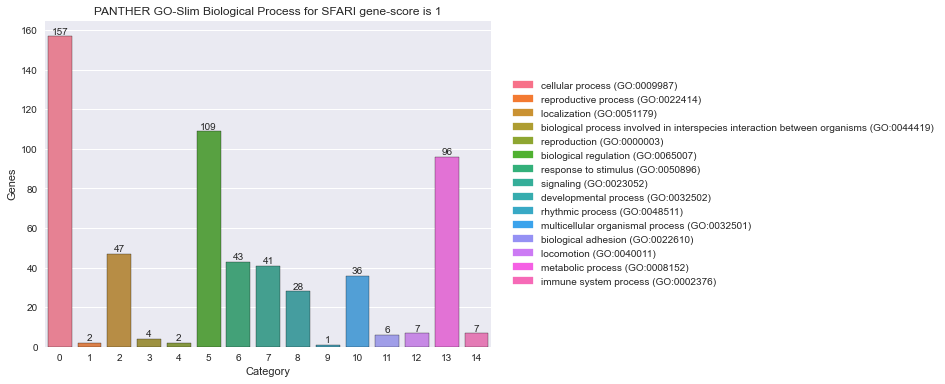

In [163]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.rcParams["patch.force_edgecolor"] = True

# create a color palette the length of the dataframe
colors = sns.color_palette('husl', n_colors=len(df))

# plot
p = sns.barplot(x=df.index, y='genes', data=df, palette=colors)

for i in p.containers:
    p.bar_label(i,)

# create color map with colors and df.names
cmap = dict(zip(df['Category name (Accession)'], colors))

# create the rectangles for the legend
patches = [Patch(color=v, label=k) for k, v in cmap.items()]

# add the legend
plt.legend(handles=patches, bbox_to_anchor=(1.04, 0.5), loc='center left', borderaxespad=0)
plt.xlabel('Category')
plt.ylabel('Genes')
plt.title('PANTHER GO-Slim Biological Process for SFARI gene-score is 1')
plt.show()

In [164]:
def draw(df, types):
    plt.style.use('seaborn')
    plt.rcParams['figure.figsize'] = (8.0, 6.0)
    plt.rcParams["patch.force_edgecolor"] = True

    # create a color palette the length of the dataframe
    colors = sns.color_palette('husl', n_colors=len(df))

    # plot
    p = sns.barplot(x=df.index, y='genes', data=df, palette=colors)

    for i in p.containers:
        p.bar_label(i,)

    # create color map with colors and df.names
    cmap = dict(zip(df['Category name (Accession)'], colors))

    # create the rectangles for the legend
    patches = [Patch(color=v, label=k) for k, v in cmap.items()]

    # add the legend
    plt.legend(handles=patches, bbox_to_anchor=(1.04, 0.5), loc='center left', borderaxespad=0)
    plt.xlabel('Category')
    plt.ylabel('Genes')
    plt.title('PANTHER GO-Slim Biological Process for ' + types)
    plt.show()

<ipython-input-164-f1d6f461ad52>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


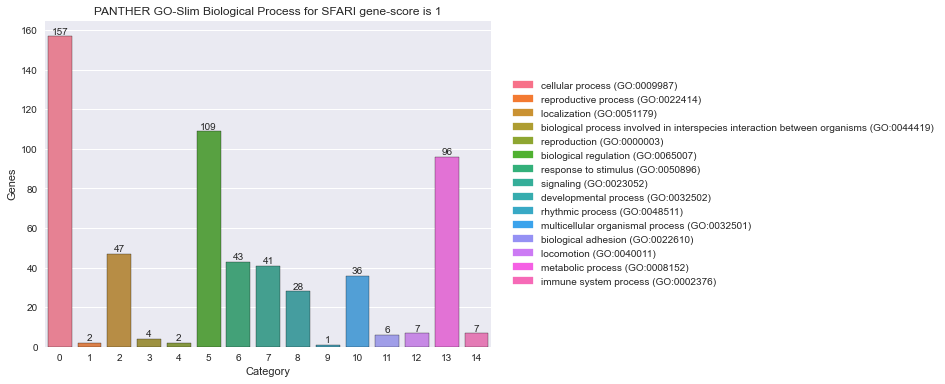

In [165]:
draw(br_sc1[['Category name (Accession)','genes']], 'SFARI gene-score is 1')

In [166]:
sum(df['genes'])

586

In [168]:
len(df)

15

**new task 5**

In [177]:
table1_list = list(pd.read_csv('task5_s1.txt', header=None)[0])
len(table1_list)

214

In [178]:
# with open('task5_s1_new.txt', 'w') as f:    
#     f.write('\n'.join('GeneID:' + str(idx) for idx in table1_list))

In [179]:
table2_list = list(pd.read_csv('task5_s2.txt', header=None)[0])

In [180]:
# with open('task5_s2_new.txt', 'w') as f:    
#     f.write('\n'.join('GeneID:' + str(idx) for idx in table2_list))

In [181]:
table3_list = list(pd.read_csv('task5_s3.txt', header=None)[0])

In [182]:
with open('task5_s3_new.txt', 'w') as f:    
    f.write('\n'.join('GeneID:' + str(idx) for idx in table3_list))